**Task 2:**
Use this example - https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/ to understand pytorch NNs. Augment the dataset by perturbing the data fields with gaussian noise. Train/test/validate. Take a screencast walkthrough of the full code, including your understanding of how the NN is implemented.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch import optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [46]:
#load the dataset as a numpy array
dataset = np.loadtxt("C:/Jupyter Notebooks/pima-indians-diabetes.csv.txt", delimiter=',')

In [43]:
df = pd.DataFrame(dataset, columns=['Pregnancies', 'Glucose', 'BP', 'Skin thickness', 'Insulin','BMI','Function','Age','Outcome'])
df.head()

,Pregnancies,Glucose,BP,Skin thickness,Insulin,BMI,Function,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [3]:
X = dataset[:,0:8] #learning variables or input variables
y = dataset[:,8]   #output variable (label)

In [4]:
#converting numpy array into tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [65]:
#split data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
#split train data further to train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

torch.Size([621, 8])

**Model Class**

In [6]:

class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

**Model without Data augmentation**

In [7]:
model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [8]:
loss_fn = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
n_epochs = 100
batch_size = 50
train_loss_graph = []
val_loss_graph = []

#training and validation loop

for epoch in range(n_epochs):
    model.train() #setting model to train mode
    epoch_train_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        ybatch = y_train[i:i+batch_size]
        optimizer.zero_grad()
        y_pred = model(Xbatch)
        loss = loss_fn(y_pred, ybatch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * len(Xbatch)  # Accumulate the loss for all batches in current epoch

    epoch_train_loss /= len(X_train)  # Average loss for the entire epoch
    train_loss_graph.append(epoch_train_loss)

    model.eval()  #setting model to inference mode
    epoch_val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_val), batch_size):
            Xbatch = X_val[i:i+batch_size]
            ybatch = y_val[i:i+batch_size]
            y_pred = model(Xbatch)
            val_loss = loss_fn(y_pred, ybatch)
            epoch_val_loss += val_loss.item() * len(Xbatch)  

    epoch_val_loss /= len(X_val)  
    val_loss_graph.append(epoch_val_loss)

    print(f'Finished epoch {epoch+1}, training loss: {epoch_train_loss}, validation loss: {epoch_val_loss}')


Finished epoch 1, training loss: 0.863919341813731, validation loss: 0.6671038269996643
Finished epoch 2, training loss: 0.6901967041734336, validation loss: 0.644127973488399
Finished epoch 3, training loss: 0.6625878510459802, validation loss: 0.6632173657417297
Finished epoch 4, training loss: 0.6598678266752553, validation loss: 0.6518896051815578
Finished epoch 5, training loss: 0.651509618125676, validation loss: 0.6466614859444755
Finished epoch 6, training loss: 0.6477963551998906, validation loss: 0.6446832162993295
Finished epoch 7, training loss: 0.6431166204277444, validation loss: 0.6473846094948905
Finished epoch 8, training loss: 0.6388595579327017, validation loss: 0.6499756148883274
Finished epoch 9, training loss: 0.6342985750012544, validation loss: 0.6546053460666111
Finished epoch 10, training loss: 0.6304646369531727, validation loss: 0.656697690486908
Finished epoch 11, training loss: 0.6272508632541662, validation loss: 0.657471912247794
Finished epoch 12, train

In [10]:

def plot_graph(train_loss_graph,val_loss_graph):
    # plot training and validation loss over epochs
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    plt.plot(train_loss_graph, label='Training loss')
    plt.plot(val_loss_graph, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss over Epochs')
    plt.show()
   

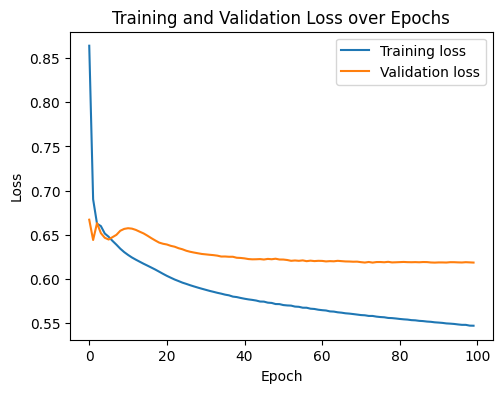

In [11]:
plot_graph(train_loss_graph,val_loss_graph)

*Evaluation on test data*

In [55]:
#computing accuracy on test data
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
 accuracy = (y_pred.round() == y_test).float().mean()
print(f"Accuracy {accuracy*100}")

print("Predicted labels vs. Expected labels:")
for i in range(10):
    print(f'Predicted label: {y_pred[i].round().item()}, Expected label: {y_test[i].item()}')

Accuracy 74.0259780883789
Predicted labels vs. Expected labels:
Predicted label: 1.0, Expected label: 1.0
Predicted label: 0.0, Expected label: 0.0
Predicted label: 0.0, Expected label: 0.0
Predicted label: 1.0, Expected label: 1.0
Predicted label: 0.0, Expected label: 0.0
Predicted label: 0.0, Expected label: 0.0
Predicted label: 1.0, Expected label: 1.0
Predicted label: 1.0, Expected label: 1.0
Predicted label: 1.0, Expected label: 0.0
Predicted label: 0.0, Expected label: 0.0


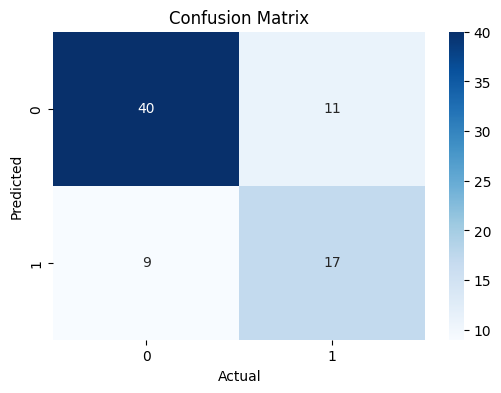

In [56]:
#confusion matrix

predictions_mat = []
with torch.no_grad():
    for data in X_test:
        y_pred = model(data)
        predictions_mat.append(y_pred.round().item())

cm = confusion_matrix(y_test, predictions_mat)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**Model training with data augmentation**

In [57]:
def augment_with_gaussian_noise(data, labels, num_times, mean=0, std=0.2):
    augmented_data = []
    augmented_labels = []
    for _ in range(num_times):
        noisy_data = data.clone()  
        noise = torch.randn_like(noisy_data) * std + mean  
        noisy_data += noise  
        augmented_data.append(noisy_data)
        augmented_labels.append(labels)
    return torch.cat(augmented_data, dim=0), torch.cat(augmented_labels, dim=0)
a,b = augment_with_gaussian_noise(X_train.clone(), y_train.clone(), num_times=3)

In [58]:
a.size()

torch.Size([1863, 8])

In [59]:
model_aug = PimaClassifier()
loss_fn = nn.BCELoss()  
optimizer_aug = optim.Adam(model_aug.parameters(), lr=0.001)


In [60]:
n_epochs = 200
batch_size = 100
train_loss_graph_aug = []
val_loss_graph_aug = []

for epoch in range(n_epochs):
    model_aug.train()
    epoch_train_loss = 0.0
    for i in range(0, len(a), batch_size):
        Xbatch = a[i:i+batch_size]
        ybatch = b[i:i+batch_size]
        optimizer_aug.zero_grad()
        y_pred = model_aug(Xbatch)
        loss = loss_fn(y_pred, ybatch)
        loss.backward()
        optimizer_aug.step()
        epoch_train_loss += loss.item() * len(Xbatch)  

    epoch_train_loss /= len(a)  
    train_loss_graph_aug.append(epoch_train_loss)

    model_aug.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_val), batch_size):
            Xbatch = X_val[i:i+batch_size]
            ybatch = y_val[i:i+batch_size]
            y_pred = model_aug(Xbatch)
            val_loss = loss_fn(y_pred, ybatch)
            epoch_val_loss += val_loss.item() * len(Xbatch)  

    epoch_val_loss /= len(X_val)  
    val_loss_graph_aug.append(epoch_val_loss)

    print(f'Finished epoch {epoch+1}, training loss: {epoch_train_loss}, validation loss: {epoch_val_loss}')


Finished epoch 1, training loss: 3.144652481176363, validation loss: 2.1756861209869385
Finished epoch 2, training loss: 1.6758880241545566, validation loss: 1.0915546417236328
Finished epoch 3, training loss: 0.8201851385355123, validation loss: 0.6900036334991455
Finished epoch 4, training loss: 0.6607773133778022, validation loss: 0.6546226143836975
Finished epoch 5, training loss: 0.6212341952439092, validation loss: 0.6569547653198242
Finished epoch 6, training loss: 0.6088145498428303, validation loss: 0.6492992043495178
Finished epoch 7, training loss: 0.600756006124387, validation loss: 0.6472657918930054
Finished epoch 8, training loss: 0.5934265543553244, validation loss: 0.6427479982376099
Finished epoch 9, training loss: 0.5868727024114714, validation loss: 0.6390079259872437
Finished epoch 10, training loss: 0.5817868780590678, validation loss: 0.6403422951698303
Finished epoch 11, training loss: 0.5777471988865335, validation loss: 0.6409605145454407
Finished epoch 12, tr

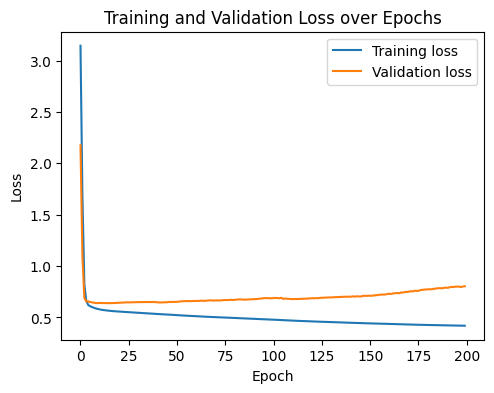

In [61]:
plot_graph(train_loss_graph_aug,val_loss_graph_aug)

In [63]:
model_aug.eval()
with torch.no_grad():
    y_pred = model_aug(X_test)
    
test_accuracy = (y_pred.round() == y_test).float().mean()
print(f"Test accuracy {test_accuracy*100}")

print("Predicted labels vs. Expected labels:")
for i in range(10):
    print(f'Predicted label: {y_pred[i].round().item()}, Expected label: {y_test[i].item()}')

Test accuracy 81.81818389892578
Predicted labels vs. Expected labels:
Predicted label: 1.0, Expected label: 1.0
Predicted label: 0.0, Expected label: 0.0
Predicted label: 0.0, Expected label: 0.0
Predicted label: 1.0, Expected label: 1.0
Predicted label: 0.0, Expected label: 0.0
Predicted label: 0.0, Expected label: 0.0
Predicted label: 1.0, Expected label: 1.0
Predicted label: 1.0, Expected label: 1.0
Predicted label: 1.0, Expected label: 0.0
Predicted label: 0.0, Expected label: 0.0


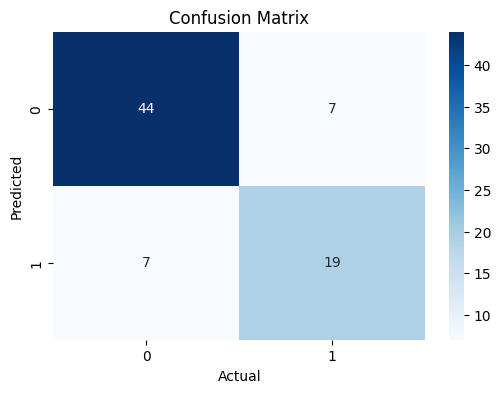

In [64]:
#confusion matrix
predictions_mat1 = []
with torch.no_grad():
    for data in X_test:
        y_pred = model_aug(data)
        predictions_mat1.append(y_pred.round().item())

cm1 = confusion_matrix(y_test, predictions_mat1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()